# Week 6: 2016/02/22-26

In [2]:
from tock import *

## Monday reading

Read Section 2.2, Lemma 2.21.

## Tuesday class

This week we'll show that the two models we learned last week, context-free grammars and pushdown automata, are equivalent. Today we will show how to convert a context-free grammar to a pushdown automaton, which is important because it is the basis for a lot of _parsing_ algorithms (algorithms that take a string as input, decide whether it belongs to the language, and if so, generates a tree as output).

### The top-down construction

The construction used in the proof of Lemma 2.21 is known as _top-down_ or sometimes "nondeterministic LL" parsing.

The basic idea is pretty simple, and probably easier to describe first without getting into the details of the PDA. The stack is initialized to $S\mathtt{$}$ (remember that the top of the stack is on the left). 

Whenever the top stack symbol is a terminal symbol and it matches the next input symbol, we pop it and read in the input symbol. If it doesn't match, then this path of the derivation rejects.

Whenever the top stack symbol is a nonterminal symbol, we pop it and nondeterministically push _all possible_ replacements for the nonterminal. Each replacement is pushed in reverse order, so that the leftmost symbol is on the top.

If we reach the end of the input string and the stack just has $\mathtt{$}$, then we accept.

Here's an example grammar:

\begin{align*}
S &\rightarrow \mathtt{a} T \mathtt{b} \\
S &\rightarrow \mathtt{b} \\
T &\rightarrow T \mathtt{a} \\
T &\rightarrow \varepsilon
\end{align*}

Here's what the _successful_ parse looks like for string `aaab`:

| Input | Stack |
|-------|-------|
|`aaab` | _S_`$`|
|`aaab` | `a`_T_`b$` |
|`aab` | _T_`b$` |
|`aab` | _T_`ab$` |
|`aab` | _T_`aab$` |
|`aab` | `aab$` |
|`ab` | `ab$` |
|`b` | `b$` |
|$\varepsilon$ | `$` |

There are also many unsuccessful parses, but as long as one of them succeeds, we accept the string.

The conversion from CFG to PDA basically implements the above algorithm in the PDA. This construction is implemented in Tock:

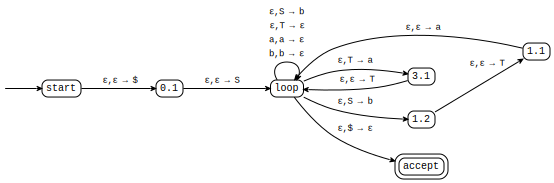

In [3]:
m = from_grammar(["S -> a T b",
                  "S -> b",
                  "T -> T a",
                  "T -> &"])
to_graph(m)

**Question.** Convert the following CFG to a PDA:

\begin{align*}
S &\rightarrow \mathtt{0} S \mathtt{0} \\
S &\rightarrow \mathtt{1} S \mathtt{1} \\
S &\rightarrow \varepsilon
\end{align*}

**Question.** If you actually had to implement a parser this way, how would you do it? What would its time complexity be?

### The bottom-up construction

There's another parsing strategy that the book doesn't mention at this point. It's called _bottom-up_, _shift-reduce_, or maybe sometimes "nondeterministic LR" parsing. It's the basis for most parsing algorithms that are used in compilers.

The idea is again pretty simple -- it's like top-down parsing in reverse. The stack is initialized to $\mathtt{\$}$. At any point in time, we can do two operations.

In a _shift_, we read in one input symbol and push it onto the stack.

In a _reduce_, we check to see if the prefix (top symbols) of the stack match a right-hand-side of a rule (in reverse order), and if so, we can pop those symbols and replace them with the left-hand-side of the rule.

This algorithm is again nondeterministic: it's always possible to do a shift unless we're at the end of the string, and it may be possible to do several different reduces.

If we reach the end of the input and the stack has just $S\mathtt{\$}$, then we accept.

Here's what the _successful_ parse looks like for string `aaab`:

| Input | Stack |
|-------|-------|
|`aaab` | `$`|
|`aab` | `a$` |
|`aab` | _T_`a$` |
|`ab` | `a`_T_`a$` |
|`ab` | _T_`a$` |
|`b` | `a`_T_`a$` |
|`b` | _T_`a$` |
|$\varepsilon$ | `b`_T_`a$` |
|$\varepsilon$ | _S_`$` |


This construction is not yet implemented in Tock, but here's what the PDA would look like:

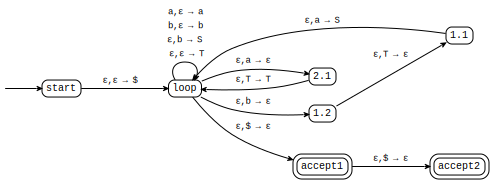

In [7]:
m = read_csv("shiftreduce.csv")
to_graph(m)

## Wednesday reading

Read Section 2.2, Lemma 2.27.

## Thursday class

CP1 is due tonight.

See posted PDF for notes. Here, we just include an example of the PDA to CFG conversion. The implementation in Tock follows the book closely, so the output grammar may include a lot of unreachable nonterminals.

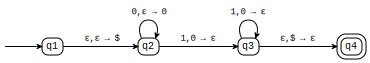

In [10]:
m1 = read_csv("pda-m1.csv")
to_graph(m)

In [11]:
to_table(m)

,"ε,ε","ε,$","0,ε","1,0"
>q1,"q2,$",,,
q2,,,"q2,0","q3,ε"
q3,,"q4,ε",,"q3,ε"
@q4,,,,


In [12]:
to_grammar(m)